<a href="https://colab.research.google.com/github/pd8459/Boston-house-prices-deep-learning/blob/main/Boston_Home_Price_Prediction_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn


In [ ]:
data = pd.read_excel('boston.xlsx')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
model = nn.Sequential(
    nn.Linear(13,100),
    nn.ReLU(),
    nn.Linear(100,1)
)



In [ ]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [ ]:
X = data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values

In [ ]:
Y = data[['target']].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X,Y,
                                                  test_size=0.3,
                                                  shuffle=True,
                                                  random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      random_state=42)

In [ ]:
x_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

x_valid = torch.Tensor(X_valid)
y_valid = torch.Tensor(y_valid)

x_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
batch_size = 64
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset,batch_size,shuffle=True, drop_last=True)

In [ ]:
learning_rate = 0.001
from torch.optim.adam import Adam
optim = Adam(model.parameters(), lr = learning_rate)

In [ ]:
loss_train_record=[]
loss_valid_record=[]

torch.manual_seed(42)
for epoch in range(5000):
  for x, y in train_dataloader:

    optim.zero_grad()

    preds_train = model(x)
    preds_valid = model(x_valid)

  loss_train = nn.MSELoss()(preds_train,y)
  loss_valid = nn.MSELoss()(preds_valid,y_valid)

  loss_train.backward()
  optim.step()

  loss_train_record.append(loss_train.item())
  loss_valid_record.append(loss_valid.item())
  if epoch % 1000 == 0:
    print(f'epoch{epoch} loss:{loss_train.item()}, loss_valid:{loss_valid.item()}')

epoch0 loss:760.5294799804688, loss_valid:581.4288330078125
epoch1000 loss:14.251195907592773, loss_valid:30.224519729614258
epoch2000 loss:13.424220085144043, loss_valid:30.991317749023438
epoch3000 loss:11.642311096191406, loss_valid:27.817466735839844
epoch4000 loss:11.076138496398926, loss_valid:23.23366928100586


<function matplotlib.pyplot.show(close=None, block=None)>

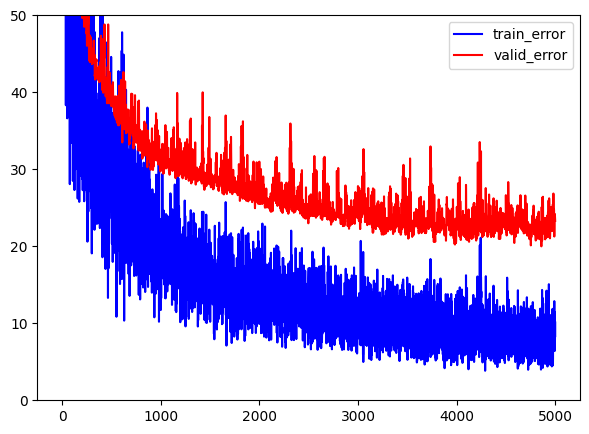

In [ ]:
plt.figure(figsize = (7,5))
plt.plot(loss_train_record, 'b', label='train_error')
plt.plot(loss_valid_record,'r',label='valid_error')
plt.ylim([0,50])
plt.legend()
plt.show

In [ ]:
preds_test = model(x_test)

In [ ]:
preds_test

tensor([[25.4871],
        [35.3594],
        [15.0378],
        [26.3822],
        [16.2221],
        [20.1497],
        [20.3088],
        [16.9410],
        [20.5306],
        [21.1068],
        [22.2250],
        [20.2157],
        [ 2.2941],
        [20.9553],
        [19.7950],
        [21.5547],
        [19.1883],
        [11.9035],
        [45.2610],
        [15.1637],
        [24.0828],
        [23.6056],
        [15.4394],
        [22.3630],
        [17.2907],
        [13.1868],
        [23.9084],
        [15.0184],
        [20.3318],
        [20.2503],
        [21.3579],
        [23.7620],
        [20.6425],
        [22.9101],
        [14.0989],
        [19.2307],
        [30.3450],
        [19.7296],
        [21.3386],
        [25.1041],
        [15.9579],
        [32.0229],
        [49.5938],
        [18.9324],
        [23.6201],
        [15.3515],
        [15.5292],
        [26.4563],
        [17.6282],
        [34.6253],
        [21.3176],
        [38.0901],
        [18.

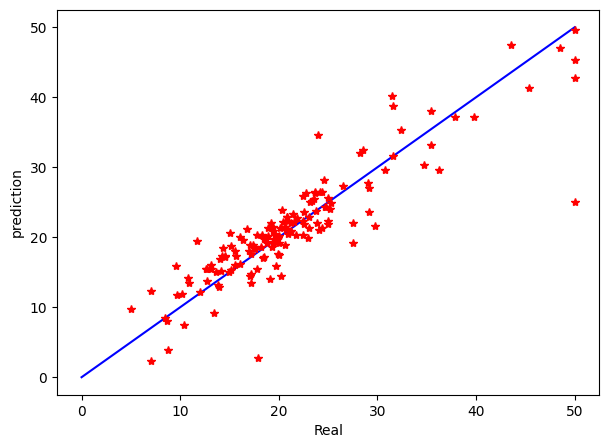

In [ ]:
with torch.no_grad():
  plt.figure(figsize = (7,5))
  x=np.linspace(0,50,1000)
  y=x
  plt.plot(x,y,'b')
  plt.plot(y_test,preds_test,'*r')
  plt.xlabel('Real')
  plt.ylabel('prediction')
  plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,preds_test.detach())

0.7965504321330926